<a href="https://colab.research.google.com/github/tnthdrhks1/knu_machine_learning/blob/main/1212.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import matplotlib
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
#sklean 은 배열 사용
ds, ds_info = tfds.load(
    "binary_alpha_digits",
    split='train',
    with_info = True
)

In [ ]:
ds_info

tfds.core.DatasetInfo(
    name='binary_alpha_digits',
    version=1.0.0,
    description='Binary 20x16 digits of '0' through '9' and capital 'A' through 'Z'. 39 examples of each class.',
    homepage='https://cs.nyu.edu/~roweis/data/',
    features=FeaturesDict({
        'image': Image(shape=(20, 16, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=36),
    }),
    total_num_examples=1404,
    splits={
        'train': 1404,
    },
    supervised_keys=('image', 'label'),
    citation="""""",
    redistribution_info=,
)

In [ ]:
ds = tfds.as_numpy(ds)

In [ ]:
listx = []
listy = []

for sample in ds:
  x = sample['image']
  y = sample['label']

  listx.append(x.reshape(20,16))
  listy.append(y)

In [ ]:
listx = np.array(listx).reshape(-1,20,16)
listy = np.array(listy)
listx[:5,:,:].shape

(5, 20, 16)

In [ ]:
def makegph(size):
  graph = listx[:size,:,:].reshape(size*20,16)
  plt.imshow(graph)

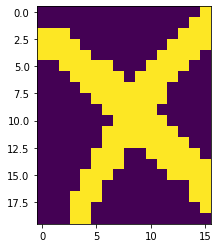

In [ ]:
makegph(1)

In [ ]:
listx.shape, listy.shape

((1404, 320), (1404,))

In [ ]:
listx = np.array(listx).reshape(1404,-1)
listy = np.array(listy)

In [ ]:
 = listx[::2]# 짝수
test_x = listx[1::2]# 홀수
train_y = listy[::2]
test_y = listy[1::2]

In [ ]:
model = SGDClassifier().fit(listx, listy)
model.score(listx, listy)

0.9772079772079773

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
np.set_printoptions(threshold=10000)
cm = confusion_matrix(test_y, model.predict(test_x))
np.savetxt('confusion_matrix.txt', cm, fmt='%2d')
#cm

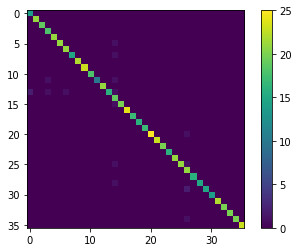

In [ ]:
plt.imshow(cm)
plt.colorbar()

In [ ]:
classes = list('0123456789abcdefghijklmnopqrstuvwxyz')
print(classification_report(test_y, model.predict(test_x), labels=classes))#오차 행렬

              precision    recall  f1-score   support

           0       0.88      1.00      0.93        14
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        19
           3       0.90      1.00      0.95        18
           4       1.00      1.00      1.00        21
           5       1.00      0.95      0.98        22
           6       0.95      1.00      0.98        21
           7       1.00      0.94      0.97        16
           8       1.00      1.00      1.00        22
           9       1.00      1.00      1.00        23
           a       0.00      0.00      0.00         0
           b       0.00      0.00      0.00         0
           c       0.00      0.00      0.00         0
           d       0.00      0.00      0.00         0
           e       0.00      0.00      0.00         0
           f       0.00      0.00      0.00         0
           g       0.00      0.00      0.00         0
           h       0.00    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
m,n = listx.shape
randx = np.random.rand(m,n)
sumx = np.concatenate((listx,listx+randx,listx-randx),axis = 0)
sumy = np.concatenate((listy,listy,listy),axis = 0)

In [ ]:
sumx.shape, sumy.shape

((4212, 320), (4212,))

In [ ]:
model = SGDClassifier().fit(sumx, sumy)
model.score(sumx, sumy)

0.949667616334283

# 이미지를 회전하여 학습데이터 늘이기


In [ ]:
from PIL import Image

In [ ]:
listrotate = []
for i in range(len(listx)):
  x = listx[i]
  x_2d = x.reshape(20,16)
  img = Image.fromarray(x_2d)
  img_rotate = img.rotate(50)
  img_rotate = np.array(img_rotate)
  listrotate.append(img_rotate)

listrotate = np.array(listrotate)

In [ ]:
x = listx[2]
x_2d = x.reshape(20,16)
img = Image.fromarray(x_2d*255)
img_rotate = img.rotate(50)
img_rotate

In [ ]:
listx.shape

(1404, 20, 16)

In [ ]:
sumxx = np.concatenate((listx, listrotate),axis=0)
sumxx.shape

(2808, 20, 16)

In [ ]:
sumxx = sumxx.reshape(-1,20*16)
sumxx.shape

(2808, 320)

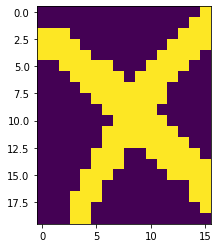

In [ ]:
plt.imshow(sumxx[0].reshape(20,16))

In [ ]:
sumyy = np.concatenate((listy, listy),axis=0)
sumyy.shape

(2808,)

In [ ]:
model = MLPClassifier((100,100),alpha=0.0001*1000).fit(sumxx, sumyy) #모델링, 최선의 모델을 찾는 과정
model.score(sumxx, sumyy)

0.9722222222222222

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
np.set_printoptions(threshold=10000)
cm = confusion_matrix(sumyy, model.predict(sumxx))
np.savetxt('confusion_matrix.txt', cm, fmt='%2d')
#cm

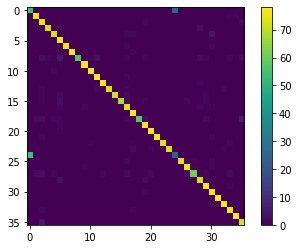

In [ ]:
plt.imshow(cm)
plt.colorbar()

In [ ]:
from sklearn.neural_network import MLPClassifier

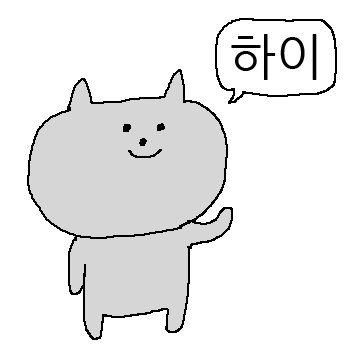

In [ ]:
import requests
from io import BytesIO
url = 'https://item.kakaocdn.net/do/5dcb1654f9fe73ffb62e88fcf31505337154249a3890514a43687a85e6b6cc82'
response = requests.get(url)
img = Image.open(BytesIO(response.content))
img

In [ ]:
img.rotate(10)
img.size

(360, 360)

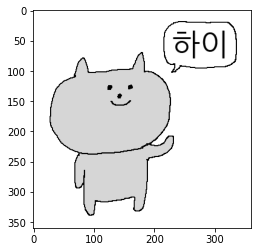

In [ ]:
arr = np.array(img)
arr_cut = arr[50:350, 0:300, :]
plt.imshow(arr)

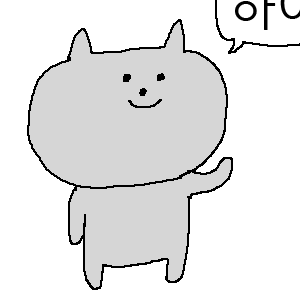

In [ ]:
Image.fromarray(arr_cut)

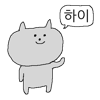

In [ ]:
img_small = img.resize((100,100))
img_small

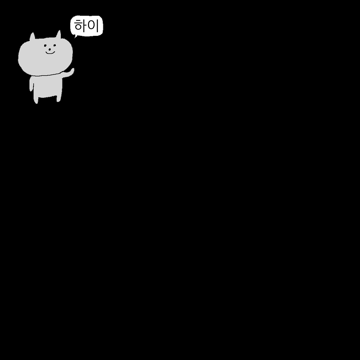

In [ ]:
img_small = img.resize((100,100))
blk = np.zeros(arr.shape, np.uint8)
blk[10:110, 10:110] = np.array(img_small)

Image.fromarray(blk[:,:,0])

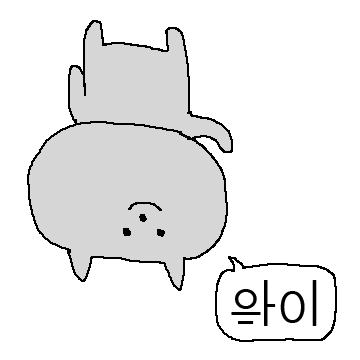

In [ ]:
Image.fromarray(arr[::-1,:,:])

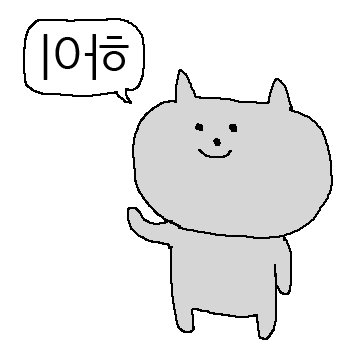

In [ ]:
Image.fromarray(arr[:,::-1,:])

# 회전, 확대, 축소하여 성능 높이기

In [ ]:
#일반

listx = []
listy = []

for sample in ds:
  x = sample['image']
  y = sample['label']

  listx.append(x.reshape(20,16))
  listy.append(y)
listx = np.array(listx)
listy = np.array(listy)
listx.shape

(1404, 20, 16)

In [ ]:
img = Image.fromarray(listx[0]*255)
img

In [ ]:
img.rotate(20)
bp.shape, listx[0].shape

((10, 8), (20, 16))

In [ ]:
bp = listx[0][:10,:8]
bimg = Image.fromarray(bp*255)
bimg.resize(img.size)
bimg = np.array(bimg)
bimg

array([[  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0],
       [255, 255, 255,   0,   0,   0,   0,   0],
       [255, 255, 255, 255,   0,   0,   0,   0],
       [255, 255, 255, 255, 255,   0,   0,   0],
       [  0,   0, 255, 255, 255, 255, 255,   0],
       [  0,   0,   0, 255, 255, 255, 255, 255],
       [  0,   0,   0,   0, 255, 255, 255, 255],
       [  0,   0,   0,   0,   0, 255, 255, 255],
       [  0,   0,   0,   0,   0,   0, 255, 255]], dtype=uint8)

In [ ]:
# 회전

for i in listx:
  a = Image.fromarray(i)
  break